## **Introduction to Tree-Based Ensembles**

* undersampling
* grid search cv

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/Telco_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
## drop CustomerID
df.drop(columns=['customerID'], inplace=True)

In [3]:
## fix TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [4]:
## impute TotalCharges with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [5]:
## map Churn to yes: 1, no: 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
## dummy encode
df = pd.get_dummies(df, drop_first=True)

In [8]:
## Create the X and y
X = df.drop(columns=['Churn'])
y = df['Churn']

In [9]:
## split 80% train 20% test random_state = 13
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [10]:
## imbalance
y_train.value_counts()

,count
Churn,
0,4126
1,1508


In [11]:
## undersampling {1	1508, 0 1508}
from imblearn.under_sampling import RandomUnderSampler

## instance
rus = RandomUnderSampler(random_state=13)

## fit
X_train, y_train = rus.fit_resample(X_train, y_train)

In [12]:
## value counts
y_train.value_counts()

,count
Churn,
0,1508
1,1508


## **Modeling**

* Tree-based models (Decision Trees, Bagging, RandomForests, Boosting)
* Logistic Regression (linear models)
* Neural Networks

#### **Decision Trees**

Hyperparameters

* Gini, entropy
* Stopping criteria (max_depth, max_leaf_nodes, min_impurity_decrease)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
## Grid Search

## 1) grid
param_grid ={
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 6, 8, None],
    'max_leaf_nodes' : [6, 8, 12, 20, None]
}

## 2) Gridseach
from sklearn.model_selection import GridSearchCV

## 3) instance of the model to optimize
dt = DecisionTreeClassifier() ## unrestricted

## 4) instance of grid search
dt_grid = GridSearchCV(dt, param_grid = param_grid , cv = 5, n_jobs = -1)

## 5) fit the grid
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 8, None],
                         'max_leaf_nodes': [6, 8, 12, 20, None]})

In [ ]:
## total models checked
2*4*5*5  ## 40 models looped 5 times each

200

In [ ]:
## best estimator (obtained the best AVG accuracy on the folds)
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=12)

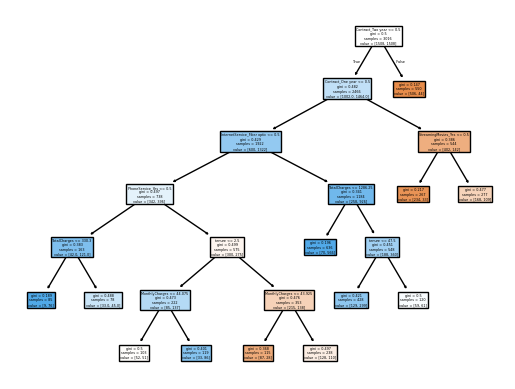

In [15]:
from sklearn.tree import plot_tree

plot_tree(dt_grid.best_estimator_, feature_names=X_train.columns, filled=True);

In [16]:
## average accuracy on the best model
dt_grid.best_score_

0.7586235489220563

In [17]:
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 12}

In [18]:
## dt_grid is NOW the best tree
from sklearn.metrics import accuracy_score

## predict
y_pred = dt_grid.predict(X_test)

## accuracy
accuracy_score(y_test, y_pred)

0.7615330021291696

#### **Bagging**

Takes Bootstrap samples (random samples with replacement) to create different data sets . If you create an ensemble of 10 trees (generates 10 bootstrap samples) and the trees are fit in these bootstrap samples. This should decrease the variance.

In [20]:
## 10 obs
df10 = df.head(10)
df10

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
5,0,8,99.65,820.50,1,False,False,False,True,False,...,False,True,False,True,False,False,True,False,True,False
6,0,22,89.10,1949.40,0,True,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
7,0,10,29.75,301.90,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
8,0,28,104.80,3046.05,1,False,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
9,0,62,56.15,3487.95,0,True,False,True,True,False,...,False,False,False,False,True,False,False,False,False,False


In [25]:
## bootstrap (sampling with replacement)
df10.sample(10, replace=True, random_state = 13)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
6,0,22,89.10,1949.40,0,True,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
9,0,62,56.15,3487.95,0,True,False,True,True,False,...,False,False,False,False,True,False,False,False,False,False
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
## obs 1, obs 5, obs 7, obs 8 were NOT selected in this bootstrap sample
## if we fit a tree on this bootstrap, we can use obs 1, obs 5, obs 7, obs 8 to check performance
## this is out-of-bag (OOB) performance

In [36]:
from sklearn.ensemble import BaggingClassifier

## ideally, you also want to perform GridSearch
## instance
bag = BaggingClassifier(estimator = DecisionTreeClassifier(max_depth = 4), n_estimators = 3, random_state = 13)

## fit
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4), n_estimators=3,
                  random_state=13)

In [37]:
## objects
bag.estimators_ ## individual models (dec. trees)

[DecisionTreeClassifier(max_depth=4, random_state=1065541591),
 DecisionTreeClassifier(max_depth=4, random_state=618499275),
 DecisionTreeClassifier(max_depth=4, random_state=2053825219)]

In [38]:
## objects
## these are the variable numbers used in each tree
bag.estimators_features_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])]

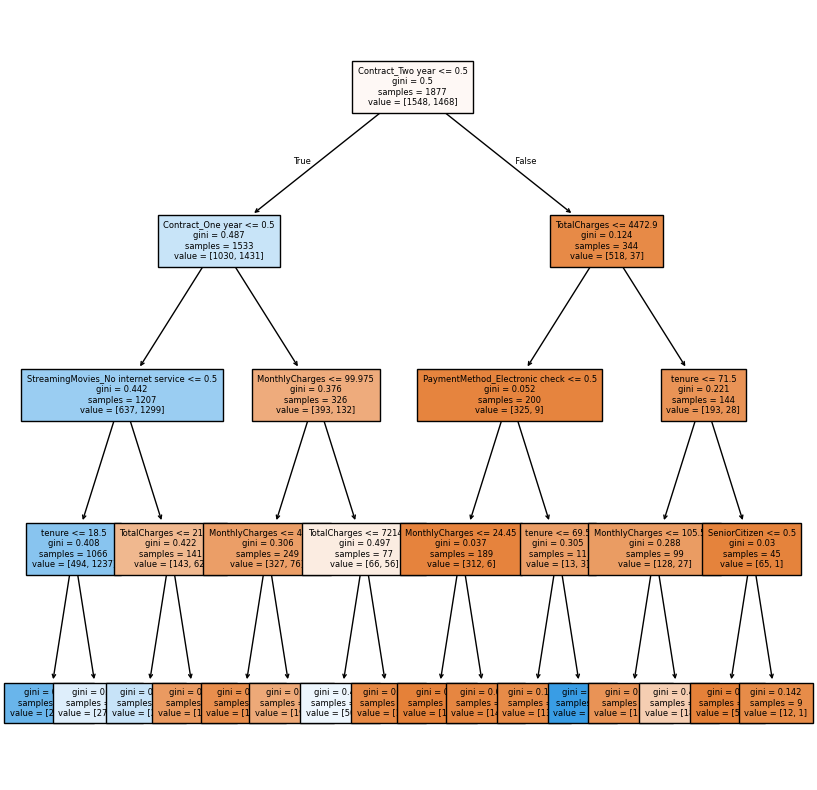

In [40]:
## tree # 1
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(bag.estimators_[0], feature_names=X_train.columns, filled=True, fontsize=6);

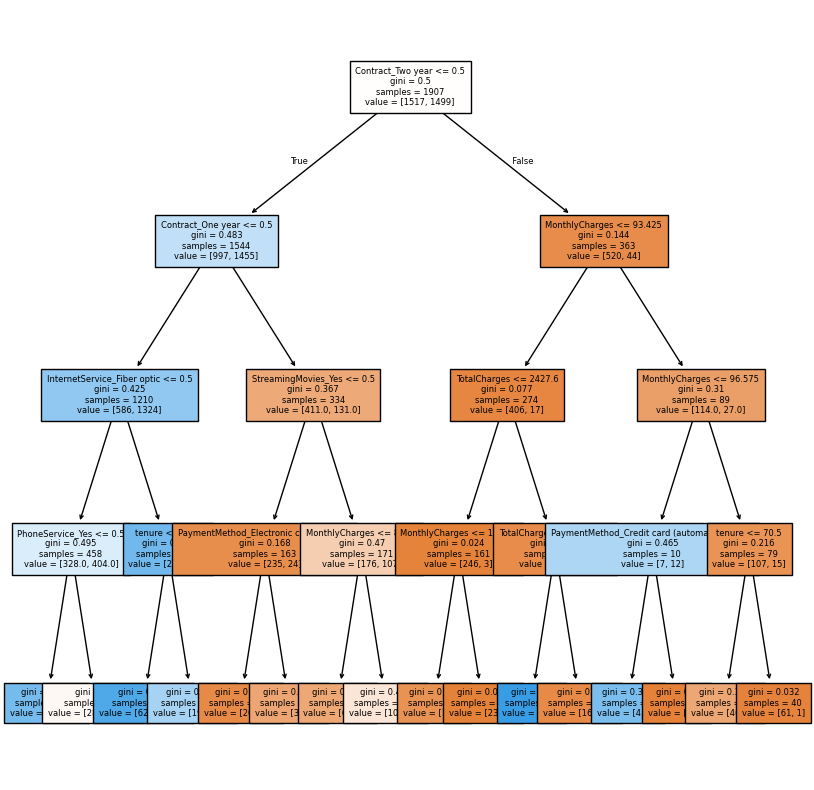

In [41]:
## tree # 2

plt.figure(figsize=(10,10))
plot_tree(bag.estimators_[1], feature_names=X_train.columns, filled=True, fontsize=6);

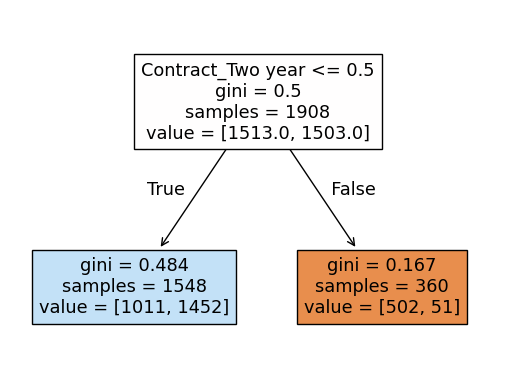

In [31]:
## tree # 3
plot_tree(bag.estimators_[2], feature_names=X_train.columns, filled=True);

In [ ]:
## what is the prediction for the first observation in the test?
bag.predict(X_test)[0]  ## ensemble prediction

0

In [ ]:
## VOTING
print(bag.estimators_[0].predict(X_test)[0])
print(bag.estimators_[1].predict(X_test)[0])
print(bag.estimators_[2].predict(X_test)[0])

0
0
0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
## what is the prediction for the first observation in the test?
bag.predict_proba(X_test)[:,1][0]  ## ensemble prediction

0.07896836084285586

In [ ]:
## AVERAGING
print(bag.estimators_[0].predict_proba(X_test)[:,1][0])
print(bag.estimators_[1].predict_proba(X_test)[:,1][0])
print(bag.estimators_[2].predict_proba(X_test)[:,1][0])

0.06666666666666667
0.07801418439716312
0.0922242314647378


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


### **Fit a Bagging Algorithm**

In [32]:
## param grid
## n_estimators
## tree: gini, entropy, max_depth ()
param_grid = {
    'n_estimators' : [10, 20, 30]
}

## bagging instance
bag = BaggingClassifier(estimator = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 12), random_state = 13)

## grid instance
bag_grid = GridSearchCV(bag, param_grid = param_grid, cv = 5, n_jobs = -1)

## fit
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6,
                                                                          max_leaf_nodes=12),
                                         random_state=13),
             n_jobs=-1, param_grid={'n_estimators': [10, 20, 30]})

In [34]:
## bag best ensemble
bag_grid.best_params_

{'n_estimators': 10}

In [35]:
## best model
bag_grid.best_estimator_

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6,
                                                   max_leaf_nodes=12),
                  random_state=13)

## **Random Forests**

Create different trees by modifying the data sets in the following way:

* bootstrap sample of the data  (if X_train has 100 obs, X_train_Bootstrap has 100 obs)
* sample of the variables choosing $\sqrt(p)$ (if X_train has 16 variables, X_Train_Bootstrap will have 4)

THis generally produces different trees every time.

In [42]:
from sklearn.ensemble import RandomForestClassifier

## instance
rf = RandomForestClassifier(n_estimators = 3, max_depth = 4, random_state = 13, oob_score = True)

## fit
rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=4, n_estimators=3, oob_score=True,
                       random_state=13)

In [43]:
## individual trees
rf.estimators_

[DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                        random_state=1192722770),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=461027504),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                        random_state=1020231754)]

In [44]:
## prediction of tree #1 on the test
rf.estimators_[0].predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 1., ..., 1., 1., 0.])

In [46]:
## OOB score (by default accuracy)
## this accuracy is the average accuracy of the model in the observations left out in the bootstrap
rf.oob_score_

0.6787135278514589

In [49]:
## predictions
yhat_rf = rf.predict(X_test)
yhat_rf

array([0, 0, 1, ..., 1, 1, 0])

In [50]:
## propensities
phat_rf = rf.predict_proba(X_test)[:,1] ## 50% cutoff (we can adjust)
phat_rf

array([0.26541658, 0.35875385, 0.63535766, ..., 0.79627764, 0.79627764,
       0.45988608])

In [51]:
## grid search on RF
## RF (100 - 200 trees - overfitting)
## max_depth (6 - 12)
param_grid = {
    'n_estimators' : [10, 20, 30],
    'max_depth' : [2, 6, 8, None],
    'criterion': ['gini', 'entropy']
}

## instance
rf = RandomForestClassifier(random_state = 13) ## unrestricted

## grid instance
rf_grid = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1)

## fit
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=13), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 8, None],
                         'n_estimators': [10, 20, 30]})

In [52]:
## best hyperparameters
rf_grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 30}

In [53]:
## predictions
yhat_rf = rf_grid.predict(X_test)

In [54]:
## prop
phat_rf = rf_grid.predict_proba(X_test)[:,1]

In [56]:
phat_rf

array([0.26605952, 0.46968988, 0.62508333, ..., 0.84528378, 0.8794807 ,
       0.46453064])

In [58]:
## to retrieve objects in a grid search, we need to find where the objects are located
## for example, where are the individual trees from the RF?
## rf.estimators_
## in rf_grid ???

## **Boosted Trees**

This is a family of models. The first boosted tree algorithm is AdaBoost (Adaptive Boosting). The focus is predicting the errors made by the previous tree in a sequential way. We do not have parallel processing anymore.

In [59]:
from sklearn.ensemble import AdaBoostClassifier

## instance
ada = AdaBoostClassifier(n_estimators = 3, random_state = 13)

## fit
ada.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=3, random_state=13)

In [60]:
## Boosting with Gradient Descent (GradientBoosting)
from sklearn.ensemble import GradientBoostingClassifier

## instance
gb = GradientBoostingClassifier(n_estimators = 3, random_state = 13)

## fit
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=3, random_state=13)

In [61]:
## Extreme Gradient Boosting
## We can use parallel processing with BOOSTING
## Fitting the trees on the errors of the other trees (not a complete sequential)
from xgboost import XGBClassifier

## instance
xgb = XGBClassifier(n_estimators = 3, random_state = 13, n_jobs = -1)

## fit
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3, n_jobs=-1,
              num_parallel_tree=None, random_state=13, ...)

In [62]:
## XGBoost - Most important hyperparameters
## Number of trees: n_estimators
## Step size (Gradient descent): learning_rate
## Tree hyperparameters: Note that names are differnt than sklearn

In [64]:
## catboost works well with categorical predictors (dummy-encoded)
## Parallel with GPUs as opposed CPUs
!pip install catboost
import catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.1 MB/s eta 0:00:00
